In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import display
from scipy.stats import skew

# Load data
folder="C:\\Users\\sriram\\OneDrive\\Kaggle\\Splunk\\"
user = pd.read_csv(folder+"user.csv")
user_res = pd.read_csv(folder+"user-resource.csv")

In [188]:
user.shape

(5817, 7)

In [6]:
print(user.columns)
print(user_res.columns)

Index(['username', 'email', 'country', 'manager', 'groups', 'status',
       'whenCreated'],
      dtype='object')
Index(['username', 'ip', 'accesstype', 'time', 'resource', 'project',
       'repository'],
      dtype='object')


In [23]:
UserAccessTypeDict={}
UserResourceDict={}
n=user_res.shape[0]
rowCount=0
for i in range(0,n):
    if len(user_res['username'][i])>1:
        try:
            UserAccessTypeDict[user_res['username'][i]].add(user_res['accesstype'][i])
        except:
            UserAccessTypeDict[user_res['username'][i]]=set()
            UserAccessTypeDict[user_res['username'][i]].add(user_res['accesstype'][i])
        try:
            UserResourceDict[user_res['username'][i]].add(user_res['resource'][i])
        except:
            UserResourceDict[user_res['username'][i]]=set()
            UserResourceDict[user_res['username'][i]].add(user_res['resource'][i])
    rowCount+=1
    if rowCount%50000==0:
        print (float(rowCount/n)*100)

7.215621531991902
14.431243063983803
21.646864595975703
28.862486127967607
36.07810765995951
43.29372919195141
50.509350723943314
57.724972255935214
64.94059378792711
72.15621531991901
79.37183685191091
86.58745838390281
93.80307991589471


In [27]:
for i,j in UserResourceDict.items():
    print(i,j)
    break

5596765c6e000e2f350970a1634363742dd76d85c624c4aec3ce6e1b {'daae8291d4904276899b0526b86cb32faff9aa5460aa0911980e0a74', '8809aaa9502beed61dd25a6ddf03d6ab712ef06b695d764cb35c772e', '08b3cd8da014319f1c5984d48c5ef79dadb48f1b82d51c26d2235dc4'}


In [85]:
#df = pd.Series(UserAccessTypeDict)
#df.index.name='username'
#accesstypedf=pd.DataFrame(df, columns=['accessType'])

df = pd.DataFrame()
df['username'] = UserAccessTypeDict.keys()
df['accessType'] = UserAccessTypeDict.values()

df1 = pd.DataFrame()
df1['username'] = UserResourceDict.keys()
df1['resource'] = UserResourceDict.values()

In [87]:
for i in range(0,704):
    df['accessType'][i]=list(df['accessType'][i])
    df1['resource'][i]=list(df1['resource'][i])

In [102]:
dfDummies=df.accessType.apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
df1Dummies=df1.resource.apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')

In [111]:
dfFinal=pd.concat([df,dfDummies], axis=1)
df1Final=pd.concat([df1,df1Dummies], axis=1)

In [189]:
df1Final.shape

(704, 1013)

In [112]:
del dfFinal['accessType']
del df1Final['resource']

In [193]:
user['groups1']=''

In [194]:

for i in range(0,704):
    check=str(user['groups'][i])
    user['groups1'][i]= [x[2:len(x)-2] for x in check.split(',')]
    if len(user['groups1'][i][0])==0:
        user['groups1'][i]=['NA']

C:\Users\sriram\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sriram\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [182]:
del user['groups']

In [197]:
user.columns

Index(['username', 'email', 'country', 'manager', 'groups', 'status',
       'whenCreated', 'groups1'],
      dtype='object')

In [200]:

#groupDummies=user.groups1.apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
#user.loc[user.groups1.str.len() > 0].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
groupDummies=user['groups'].str.get_dummies(sep=',')

In [201]:
groupDummies.head()

,00022e9c294177288dd76a01b09137a5edd94616b856e13564638bf4,001d75fda2126355411200376264eeaf8302a6c7013a33bf236c8e10,003f231d65f1df0c63095614ff51ec2071dac1256f53edf876401b99,009074b06489758c030d4df15af839046e3c58758cda91d96868971c,00cb0a8f0939e3c06b62e4a84062862f30d963fb7e2ecc50c51e55e1,00ee43902003f8a349a2b1986a30b97b3953ae4d2ff6a37e0d96684f,00f2bd0323ec4eaba75a9ed388f861cbe8f305f4a8b945df4dcdf092,00f36e8951f42efa5a1f1912948a62b630f32c389184d3e93e4be3cb,01070e75bf35c5767006edbb4254dc4324370bded3756f651fb9eb74,01143c98f142dea80e0bdbc60c46783adb12b1de211229ea2880401a,...,ff0562f88ac13992db0f80f42517a3950fb1da0278ea8c98e14515e6,ff082620a679083a5b2f639e3bb407caa18acd54b55489f32747f505,ff27b8eb6c0547aab59c1da3bc21fdcec5cc659b46ab9d629d0ee26c,ff4c6a8aa1a5b2319e7846f882a997d6e29c4688ca7fd66689d3c596,ff5459c36b1b333cf1167f08110d01f4e56c22836bbb3561014ad31f,ff67ca3c7845823efa3936133e7acb649861b416f91ce1ee1d5d6233,ff7a79d237840686ca6443ad16ce2b81991ff7f7ee67555c94c6ff00,ffb16a6acb86e031874c7e2825b0865397090b93db5c812ead2862c0,ffb798193f14f437b3cedb854bb1836ca23312fca34ee6352bd376df,ffc60968e15ad2a08b7d49eb8777704b9024902d59a8a43b97b225e0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [251]:
step0convert=pd.concat([user,groupDummies], axis=1)
del step0convert['groups']
del step0convert['groups1']
step1merge=pd.merge(step0convert,dfFinal,left_index=True,right_index=True)


In [254]:
step2merge=pd.merge(step1merge,df1Final,left_index=True,right_index=True)

In [257]:
statusDummies=user['status'].str.get_dummies(sep=',')
step2convert=pd.concat([step2merge,groupDummies], axis=1)
del step2convert['status']

In [258]:
del step2convert['whenCreated']
del step2convert['email']
step2convert.columns

Index(['username_x', 'country', 'manager',
       '00022e9c294177288dd76a01b09137a5edd94616b856e13564638bf4',
       '001d75fda2126355411200376264eeaf8302a6c7013a33bf236c8e10',
       '003f231d65f1df0c63095614ff51ec2071dac1256f53edf876401b99',
       '009074b06489758c030d4df15af839046e3c58758cda91d96868971c',
       '00cb0a8f0939e3c06b62e4a84062862f30d963fb7e2ecc50c51e55e1',
       '00ee43902003f8a349a2b1986a30b97b3953ae4d2ff6a37e0d96684f',
       '00f2bd0323ec4eaba75a9ed388f861cbe8f305f4a8b945df4dcdf092',
       ...
       'ff0562f88ac13992db0f80f42517a3950fb1da0278ea8c98e14515e6',
       'ff082620a679083a5b2f639e3bb407caa18acd54b55489f32747f505',
       'ff27b8eb6c0547aab59c1da3bc21fdcec5cc659b46ab9d629d0ee26c',
       'ff4c6a8aa1a5b2319e7846f882a997d6e29c4688ca7fd66689d3c596',
       'ff5459c36b1b333cf1167f08110d01f4e56c22836bbb3561014ad31f',
       'ff67ca3c7845823efa3936133e7acb649861b416f91ce1ee1d5d6233',
       'ff7a79d237840686ca6443ad16ce2b81991ff7f7ee67555c94c6ff00',
       '

In [218]:
countryDummies=user['country'].str.get_dummies()
managerDummies=user['manager'].str.get_dummies()


In [259]:
step3convert=pd.concat([step2convert,countryDummies], axis=1)

In [260]:
finalData = pd.concat([step3convert,managerDummies], axis=1)

In [261]:
del finalData['country']
del finalData['manager']
finalData.columns

Index(['username_x',
       '00022e9c294177288dd76a01b09137a5edd94616b856e13564638bf4',
       '001d75fda2126355411200376264eeaf8302a6c7013a33bf236c8e10',
       '003f231d65f1df0c63095614ff51ec2071dac1256f53edf876401b99',
       '009074b06489758c030d4df15af839046e3c58758cda91d96868971c',
       '00cb0a8f0939e3c06b62e4a84062862f30d963fb7e2ecc50c51e55e1',
       '00ee43902003f8a349a2b1986a30b97b3953ae4d2ff6a37e0d96684f',
       '00f2bd0323ec4eaba75a9ed388f861cbe8f305f4a8b945df4dcdf092',
       '00f36e8951f42efa5a1f1912948a62b630f32c389184d3e93e4be3cb',
       '01070e75bf35c5767006edbb4254dc4324370bded3756f651fb9eb74',
       ...
       'fd2a798a6de58373598e34064b5858b66e572a72ad4e07c4df1d0299',
       'fd35f137832140a0524743b603253765f843a252d9d612e83439a89e',
       'fd6a545184f77dd5a37ebb680c04f34ab8be513c8c91233c005f1954',
       'fd7f6cd2ec442d6aa7fd80801faa696e72b92b95166534c7d34ce603',
       'fdca467c77368828a30bfc56ae516d5970aa9e84bd3d1a66b8b918b1',
       'fdd07a2b9e5d449a50d577

In [264]:
x.shape

(704, 6680)

In [263]:
x=finalData.dropna()

In [265]:
x['username_x']

0      0d73f4e6744fd7a88dcf67142546db30e31cb5676c58fd...
1      7aef953bbf11421aef595d9bc1750a91f75787528834d0...
2      44e1aa981371ba8f06e04a565fecc76d0509c570211ca1...
3      bf4a51bc4e646cb8a0e32b07f5985ebeb761f7a966744a...
4      9378ad48d05e69c350c349b20addd8e2758d7d42428872...
5      cad321117499e133e31039cf3318ccdd99e9888b96bae2...
6      d761d450dccf3cb63c56cd32cce0ecdf780fa17951d6ab...
7      9afa76b42c5e7254184763394bd5d493e6bbb0cf105ce9...
8      a712025aa0a4508d8e53f9689933092d354b63728ecbda...
9      8d508a8da792dee6003dc6cb91950b6d4c37d0e9f16d76...
10     2cfa25b49c8c4270a68a4aca7a7b62eba27f0e1894e5f9...
11     78bc05c9fdd20cc6f05f9a25c3b324e8b3e40d735e0e10...
12     a20002f80f17e2e15f495e7e6c0838757f5c5dcd18ea0e...
13     be8b5ef4bb0872f056c2c275144fd3cff1294875908806...
14     701b0fd4722b3c6dc1c0e5184785d30e16a09b91f5b1be...
15     94c3dc39ace3294741e928383f2da1b99ad3015a58f403...
16     8e0047debbd20056891f5078d0d590cfd4e37a26085c0a...
17     20bdaf7ca2c0e63ae46f481a

In [296]:
x.columns

Index(['00022e9c294177288dd76a01b09137a5edd94616b856e13564638bf4',
       '001d75fda2126355411200376264eeaf8302a6c7013a33bf236c8e10',
       '003f231d65f1df0c63095614ff51ec2071dac1256f53edf876401b99',
       '009074b06489758c030d4df15af839046e3c58758cda91d96868971c',
       '00cb0a8f0939e3c06b62e4a84062862f30d963fb7e2ecc50c51e55e1',
       '00ee43902003f8a349a2b1986a30b97b3953ae4d2ff6a37e0d96684f',
       '00f2bd0323ec4eaba75a9ed388f861cbe8f305f4a8b945df4dcdf092',
       '00f36e8951f42efa5a1f1912948a62b630f32c389184d3e93e4be3cb',
       '01070e75bf35c5767006edbb4254dc4324370bded3756f651fb9eb74',
       '01143c98f142dea80e0bdbc60c46783adb12b1de211229ea2880401a',
       ...
       'fd2a798a6de58373598e34064b5858b66e572a72ad4e07c4df1d0299',
       'fd35f137832140a0524743b603253765f843a252d9d612e83439a89e',
       'fd6a545184f77dd5a37ebb680c04f34ab8be513c8c91233c005f1954',
       'fd7f6cd2ec442d6aa7fd80801faa696e72b92b95166534c7d34ce603',
       'fdca467c77368828a30bfc56ae516d5970aa9e84bd3

In [285]:
x.columns[2457]

'username_y'

In [286]:
x.columns[2496]

'username'

In [295]:
del x['username_x']
del x['username_y']

In [298]:
for i in range(6678):
    if x.ix[:,i].dtype=='object':
        print (i)

2494


In [299]:
x.columns[2494]

'username'

In [304]:
dataFinal=x.ix[:, x.columns != 'username']

,00022e9c294177288dd76a01b09137a5edd94616b856e13564638bf4,001d75fda2126355411200376264eeaf8302a6c7013a33bf236c8e10,003f231d65f1df0c63095614ff51ec2071dac1256f53edf876401b99,009074b06489758c030d4df15af839046e3c58758cda91d96868971c,00cb0a8f0939e3c06b62e4a84062862f30d963fb7e2ecc50c51e55e1,00ee43902003f8a349a2b1986a30b97b3953ae4d2ff6a37e0d96684f,00f2bd0323ec4eaba75a9ed388f861cbe8f305f4a8b945df4dcdf092,00f36e8951f42efa5a1f1912948a62b630f32c389184d3e93e4be3cb,01070e75bf35c5767006edbb4254dc4324370bded3756f651fb9eb74,01143c98f142dea80e0bdbc60c46783adb12b1de211229ea2880401a,...,fd2a798a6de58373598e34064b5858b66e572a72ad4e07c4df1d0299,fd35f137832140a0524743b603253765f843a252d9d612e83439a89e,fd6a545184f77dd5a37ebb680c04f34ab8be513c8c91233c005f1954,fd7f6cd2ec442d6aa7fd80801faa696e72b92b95166534c7d34ce603,fdca467c77368828a30bfc56ae516d5970aa9e84bd3d1a66b8b918b1,fdd07a2b9e5d449a50d577d65c16be37fd553eb54146e2a3cff2d6e2,febed24c7c85f8b660c377dc2086efe487f5cd6c833f769f9236bc03,fed3c84b35dcc32eb19a0e5099e9a99f2e5f6b1470b93ac3c365a5bc,ff31328fc76449a922821efaa3a120d5d8a526ca1393ed5b46f76d55,ff79eea48f180d2513b69f6c67a4ab3d208b359d03f1542a2e73668f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [317]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dataFinal)

In [306]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

134
377
29
164


In [309]:
kmeans.cluster_centers_

array([[  0.00000000e+00,   3.34448161e-03,   1.12757026e-17, ...,
          3.34448161e-03,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,  -1.08420217e-18,   9.87654321e-03, ...,
         -1.08420217e-18,   0.00000000e+00,   0.00000000e+00]])

In [324]:
Ks = range(1, 21)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(dataFinal).score(dataFinal) for i in range(len(km))]

In [330]:
import math
import numpy as np
import random

data = np.array([[1,2,3],[3,4,5],[5,6,7],[7,8,9],[10,11,12]])
centroids = np.array([[2,3,4],[6,7,8]])
labels = [0,0,1,1,1]

def Fscore(data,centroids,labels):
    k = len(centroids[:,1])
    N = len(data[:,1])

    ybar = np.sum(data, axis=0)/N
    n = []
    for i in range(0,k):
        n.append(labels.count(i))
    sum = 0
    for i in range(0,k): 
        sum += n[i]*np.dot((centroids[i]-ybar),(centroids[i]-ybar))
    nmr=sum/(k-1)
    sumc = np.zeros([k])
    j=0
    for i in labels:
        sumc[i] = sumc[i] + np.dot(centroids[i]- data[j],centroids[i]- data[j])
        j+=1
    dnr=np.sum(sumc)/(N-k)
    F =nmr/dnr
    return F

In [335]:
f_score=[]
for i in range(2,20):
    kmeansi=KMeans(n_clusters=i).fit(dataFinal)
    F=Fscore(dataFinal.values,kmeansi.cluster_centers_,list(kmeansi.labels_))
    f_score.append(F)

In [328]:
import matplotlib.pyplot as plt
plt.plot(Ks, [i*i for i in score])

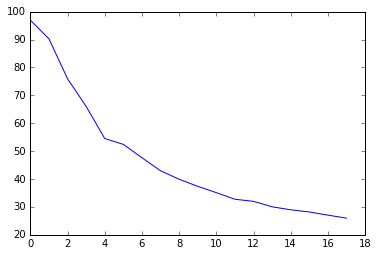

In [338]:
%matplotlib inline 
plt.plot(f_score)
plt.show()

In [339]:
km=KMeans(n_clusters=4).fit(dataFinal)
for i in range(4):
    print(sum(km.labels_==i))

29
134
164
377
